In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filePath="/content/Housing.csv"

In [17]:
df=pd.read_csv(filePath)

df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
44,7560000,6000,4,2,4,yes,no,no,no,yes,1,no,furnished
473,3003000,8050,2,1,1,yes,no,no,no,no,0,no,unfurnished
99,6265000,6000,4,1,3,yes,yes,yes,no,no,0,yes,unfurnished
520,2450000,7700,2,1,1,yes,no,no,no,no,0,no,unfurnished
128,5873000,5500,3,1,3,yes,yes,no,no,yes,1,no,furnished


In [18]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [19]:
df.describe().corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.996090,-0.431419,-0.433847,-0.434208,-0.434661
area,0.996090,1.000000,-0.362182,-0.364599,-0.364995,-0.365360
bedrooms,-0.431419,-0.362182,1.000000,0.999992,0.999994,0.999985
bathrooms,-0.433847,-0.364599,0.999992,1.000000,0.999998,0.999997
stories,-0.434208,-0.364995,0.999994,0.999998,1.000000,0.999996
parking,-0.434661,-0.365360,0.999985,0.999997,0.999996,1.000000


In [20]:
cdf=df.drop(['bathrooms','stories','parking','bedrooms',],axis=1)

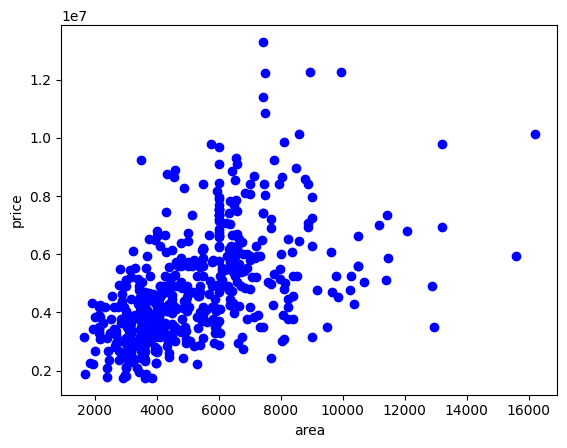

In [23]:
plt.scatter(cdf.area, cdf.price,  color='blue')
plt.xlabel("area")
plt.ylabel("price")
plt.show()

In [24]:
X = cdf.area.to_numpy()
y = cdf.price.to_numpy()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (436,), (436,))

In [27]:
from sklearn import linear_model


regressor = linear_model.LinearRegression()

regressor.fit(X_train.reshape(-1, 1), y_train)


print ('Coefficients: ', regressor.coef_[0])
print ('Intercept: ',regressor.intercept_)

Coefficients:  425.72984193878284
Intercept:  2512254.2639593435


Text(0, 0.5, 'price')

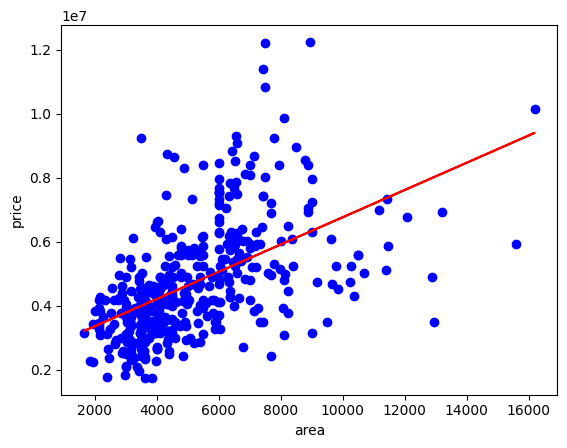

In [28]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("area")
plt.ylabel("price")

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 1474748.13
Mean squared error: 3675286604768.19
Root mean squared error: 1917103.70
R2-score: 0.27
